In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Salary Data.csv to Salary Data (1).csv


In [ ]:
import pandas as pd
data = pd.read_csv("Salary Data.csv")
# Impute missing 'Salary' values with the median
median_salary = data['Salary'].median()
data['Salary'] = data['Salary'].fillna(median_salary)

In [ ]:
X = data[['Years of Experience']]   # Features
y = data['Salary']              # Target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree
model = DecisionTreeRegressor(random_state=42)

# Train it on the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 257595696.11
R² Score: 0.89


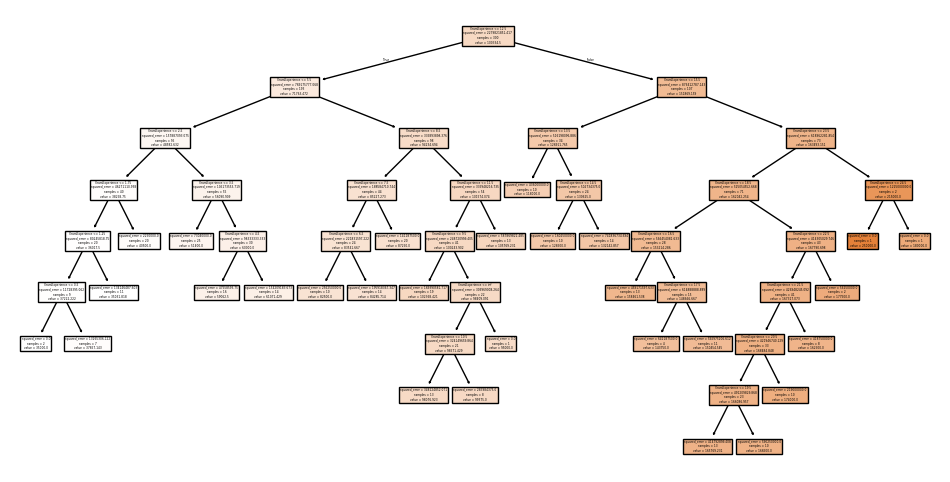

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
tree.plot_tree(model, feature_names=['YearsExperience'], filled=True)
plt.show()


In [ ]:
predictions_df = pd.DataFrame({'Years of Experience': X_test['Years of Experience'],
                               'Actual Salary': y_test,
                               'Predicted Salary': y_pred})

display(predictions_df.head())

,Years of Experience,Actual Salary,Predicted Salary
167,18.0,150000.0,150454.545455
33,10.0,65000.0,98076.923077
15,16.0,125000.0,158461.538462
316,6.0,80000.0,82500.000000
57,17.0,140000.0,143750.000000


In [ ]:
import pandas as pd

experience_10_years = pd.DataFrame({'Years of Experience': [10]})
predicted_salary_10_years = model.predict(experience_10_years)

print(f"Predicted Salary for 10 Years of Experience: ${predicted_salary_10_years[0]:,.2f}")

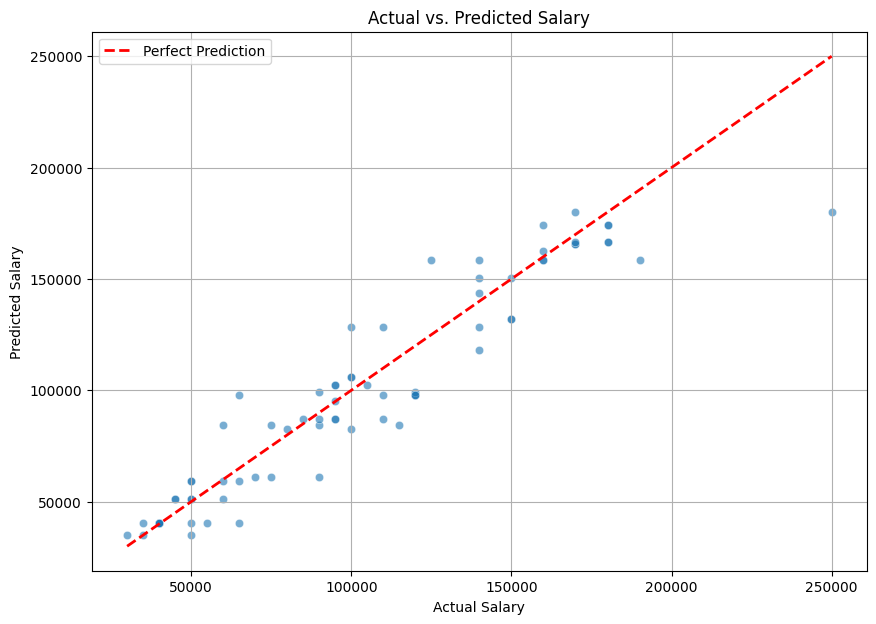

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Actual Salary', y='Predicted Salary', data=predictions_df, alpha=0.6)
plt.plot([predictions_df['Actual Salary'].min(), predictions_df['Actual Salary'].max()],
         [predictions_df['Actual Salary'].min(), predictions_df['Actual Salary'].max()],
         color='red', linestyle='--', lw=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()